Initial setup and first topic model run

In [1]:
%run "Common setup.ipynb"

In [2]:
RC = mk.RecordCollection("{}/rest_requested_corpora.txt".format(TMP_DIR))
corpora_df = wosis.rc_to_df(RC)

<hr> Running topic model on corpora

In [3]:
topic_results = wosis.find_topics(corpora_df, num_topics=5, 
                                  cache_as='{}/filtered_corpora_topics'.format(TMP_DIR))

Topic 1: model parameters sensitivity models data analysis parameter flow calibration time
Topic 2: optimization design method shape topology problem sensitivity element structural finite
Topic 3: uncertainty stochastic quantification carlo monte bayesian method uncertainties random polynomial
Topic 4: risk emissions energy assessment environmental exposure production cost health analysis
Topic 5: water soil climate river quality groundwater change management land runoff


First we check that a specific paper of interest was included in one of the topics as a high-level check 

    Title: "Uncertainty in the environmental modelling process - A framework and guidance"
    DOI: "10.1016/j.envost.2007.02.004"

In [4]:
relevant_topic = topic_results.find_paper_by_doi('10.1016/j.envost.2007.02.004')

Found in topic 3


We then select topic 1, 2, and 3 (taken to be the senstivity, model optimization, and uncertainty topics respectively)

In [5]:
model_param_df = topic_results.get_topic_by_id(1)
opti_design_df = topic_results.get_topic_by_id(2)
uncert_df = topic_results.get_topic_by_id(3)

In [6]:
model_param_rc = wosis.extract_recs(model_param_df.id, RC, name='model_param')
opti_design_rc = wosis.extract_recs(opti_design_df.id, RC, name='opti_design')
uncert_rc = wosis.extract_recs(uncert_df.id, RC, name='uncert')

In [7]:
topics_combined = model_param_rc + opti_design_rc + uncert_rc

In [8]:
# Interested in the number of publications at each topic model iteration
filter_progress = [len(corpora_df)]
filter_progress.append(len(topics_combined))

In [9]:
uasa_opt_topic_df = wosis.rc_to_df(topics_combined)

In [10]:
topics_combined_results = wosis.find_topics(uasa_opt_topic_df, num_topics=5,
                                           cache_as='{}/uasa_opt_subtopics'.format(TMP_DIR))

Topic 1: model sensitivity parameters analysis data flow models parameter soil results
Topic 2: optimization design shape topology method sensitivity structural problem analysis element
Topic 3: uncertainty bayesian uncertainties carlo monte model quantification models analysis data
Topic 4: stochastic random method polynomial chaos quantification expansion equations collocation solution
Topic 5: neural network ann artificial networks fuzzy prediction algorithm models regression


Subtopics of interest are:
* model sensitivity (Topic 1)
* optimization and design (Topic 2)
* uncertainties  (Topic 3)
* stochastic methods (Topic 4)

The IDs may change if this is being run without the cached datasets. We cannot provide the cached data as they contain proprietary WoS data.

In [11]:
model_sens_df = topics_combined_results.get_topic_by_id(1)
opti_design_df = topics_combined_results.get_topic_by_id(2)
uncert_bayes_df = topics_combined_results.get_topic_by_id(3)
stochastic_meth_df = topics_combined_results.get_topic_by_id(4)

In [12]:
st_model_sens_rc = wosis.extract_recs(model_sens_df.id, RC, name='model_sens')
st_opti_design_rc = wosis.extract_recs(opti_design_df.id, RC, name='opti_design')
st_uncert_bay_rc = wosis.extract_recs(uncert_bayes_df.id, RC, name='uncert_bay')
st_stoch_rc = wosis.extract_recs(stochastic_meth_df.id, RC, name='stochastic')

In [13]:
subtopics_combined = st_model_sens_rc + st_opti_design_rc + st_uncert_bay_rc + st_stoch_rc

In [14]:
filter_progress.append(len(subtopics_combined))

In [15]:
uasa_combined_df = wosis.rc_to_df(subtopics_combined)

Once again, we apply the topic model

In [16]:
subtopics_combined_results = wosis.find_topics(uasa_combined_df, num_topics=5,
                                               cache_as='{}/uasa_subsubtopics_combined'.format(TMP_DIR))

Topic 1: model sensitivity parameters analysis data models parameter calibration based soil
Topic 2: optimization design shape topology method sensitivity structural problem analysis element
Topic 3: uncertainty bayesian uncertainties carlo monte quantification analysis models assessment probabilistic
Topic 4: stochastic random polynomial method chaos quantification expansion equations problems collocation
Topic 5: flow transport aquifer sediment groundwater hydraulic field rate velocity concentration


Subtopics of interest are:
* model sensitivity (Topic 1)
* optimization and design (Topic 2)
* uncertainties  (Topic 3)
* stochastic/quantification methods (Topic 4)

In [17]:
sst_model_sa = subtopics_combined_results.get_topic_by_id(1)
sst_opt_design = subtopics_combined_results.get_topic_by_id(2)
sst_ua = subtopics_combined_results.get_topic_by_id(3)
sst_stochastic = subtopics_combined_results.get_topic_by_id(4)

In [18]:
sst_model_sa_rc = wosis.extract_recs(sst_model_sa.id, RC, name='model_sens2')
sst_opt_design_rc = wosis.extract_recs(sst_opt_design.id, RC, name='opti_design3')
sst_ua_rc = wosis.extract_recs(sst_ua.id, RC, name='uncertainty')
sst_stochastic_rc = wosis.extract_recs(sst_stochastic.id, RC, name='stochastic quantification')

In [19]:
subsubtopics_combined = sst_model_sa_rc + sst_opt_design_rc + sst_ua_rc + sst_stochastic_rc

In [20]:
filter_progress.append(len(subsubtopics_combined))

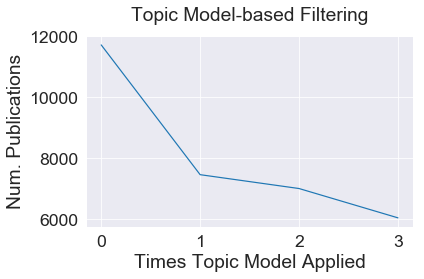

In [21]:
plt.plot(range(len(filter_progress)), filter_progress)
plt.title("Topic Model-based Filtering")
plt.xlabel('Times Topic Model Applied')
plt.ylabel('Num. Publications');

ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.tight_layout()
plt.savefig('{}/Figure_13_pub_reduction.png'.format(FIG_DIR), dpi=300, format='png')

In [22]:
subsubtopics_combined_df = wosis.rc_to_df(subsubtopics_combined)

Re-running topic model one last time to see if any new topics appear - they do not which suggests we have identified all relevant publications

In [23]:
subsubtopics_combined_results = wosis.find_topics(subsubtopics_combined_df, num_topics=5)

Topic 1: model sensitivity parameters analysis data models parameter results based soil
Topic 2: optimization design shape topology method sensitivity structural element problem analysis
Topic 3: stochastic random polynomial method chaos quantification expansion equations collocation solution
Topic 4: uncertainty bayesian uncertainties carlo monte quantification analysis models assessment probabilistic
Topic 5: rainfall flood runoff hydrological catchment model calibration watershed distributed catchments


<hr>

Plotting topic and publication trends for UA, SA, optimization.

In [24]:
sst_model_sa_rc.name = 'SA'
sst_opt_design_rc.name = 'Optimization'

UA_rc = sst_ua_rc + sst_stochastic_rc
UA_rc.name = 'UQ'

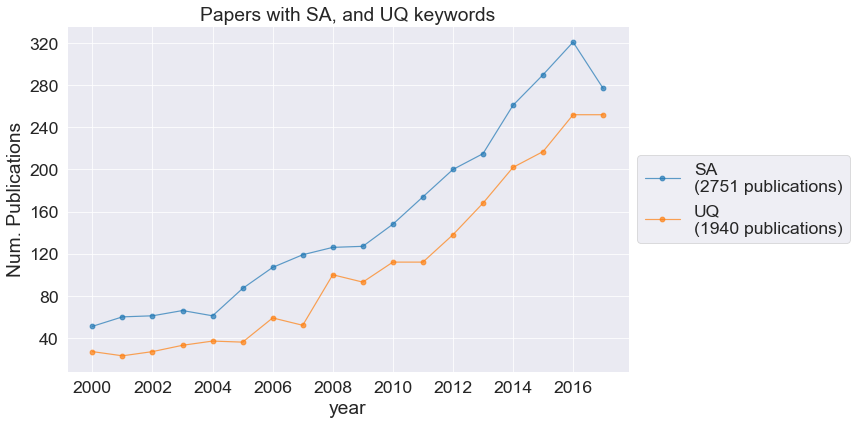

In [25]:
wos_plot.plot_topic_trend([sst_model_sa_rc, UA_rc], 
                          title='Papers with SA, and UQ keywords',
                         save_plot_fn='{}/Figure_7c.png'.format(FIG_DIR))

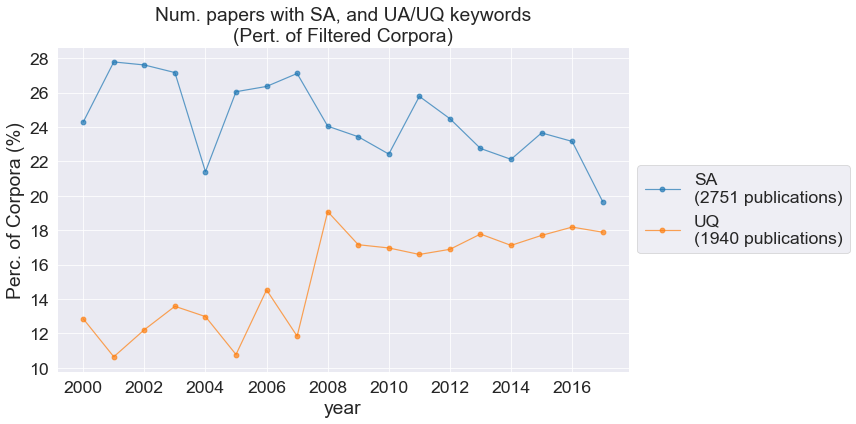

In [26]:
wos_plot.plot_topic_trend([sst_model_sa_rc, UA_rc], 
                          total_rc=RC, 
                          title='Num. papers with SA, and UA/UQ keywords\n(Pert. of Filtered Corpora)',
                          save_plot_fn='{}/Figure_7d.png'.format(FIG_DIR))

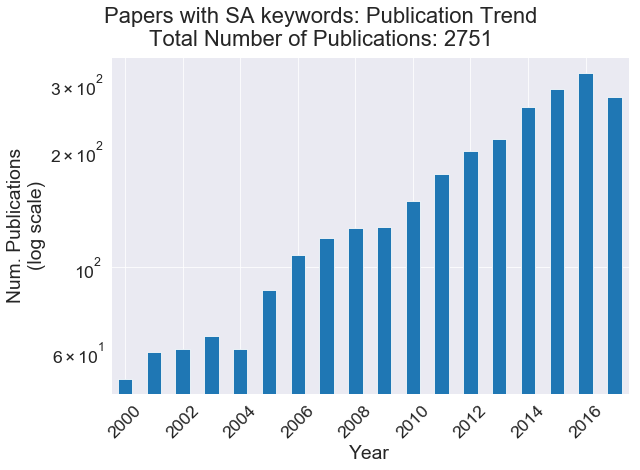

In [27]:
wos_plot.plot_pub_trend(sst_model_sa_rc, title='Papers with SA keywords: Publication Trend')

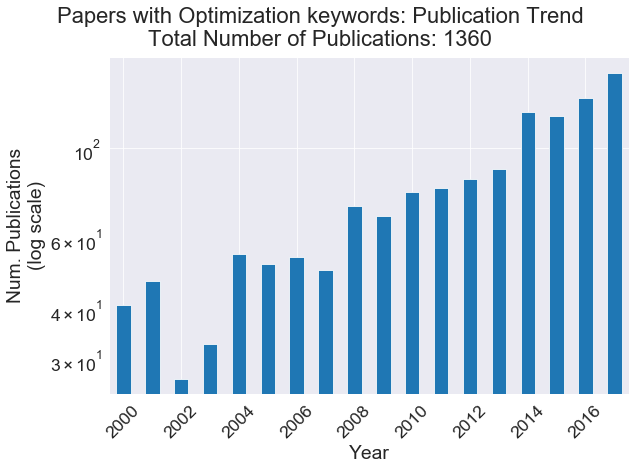

In [28]:
wos_plot.plot_pub_trend(sst_opt_design_rc, title='Papers with Optimization keywords: Publication Trend')

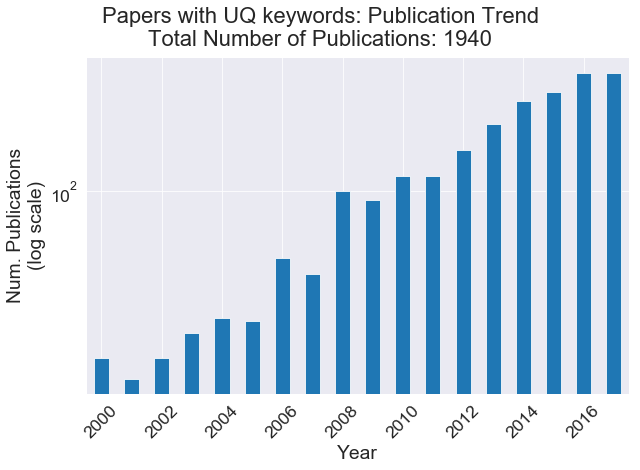

In [29]:
wos_plot.plot_pub_trend(UA_rc, title='Papers with UQ keywords: Publication Trend')

<hr>
Identifying papers relevant to frameworks and applications of UA/SA from the UA, SA, optimization topics.

In [30]:
all_uasa_sst_papers = sst_model_sa_rc + sst_opt_design_rc + UA_rc
# wosis.rc_to_df(all_uasa_sst_papers).to_csv('{}/ua_sa_sst_papers.csv'.format(DATA_DIR))

1. Frameworks and guidelines for UA/SA

In [31]:
framework_kw = ['framework', 'guideline', 'comparison', 'evalua', 'review', 'critici', 'overview', 'diagnostic']
all_frameworks = wosis.find_keywords(all_uasa_sst_papers, framework_kw, threshold=95.0)

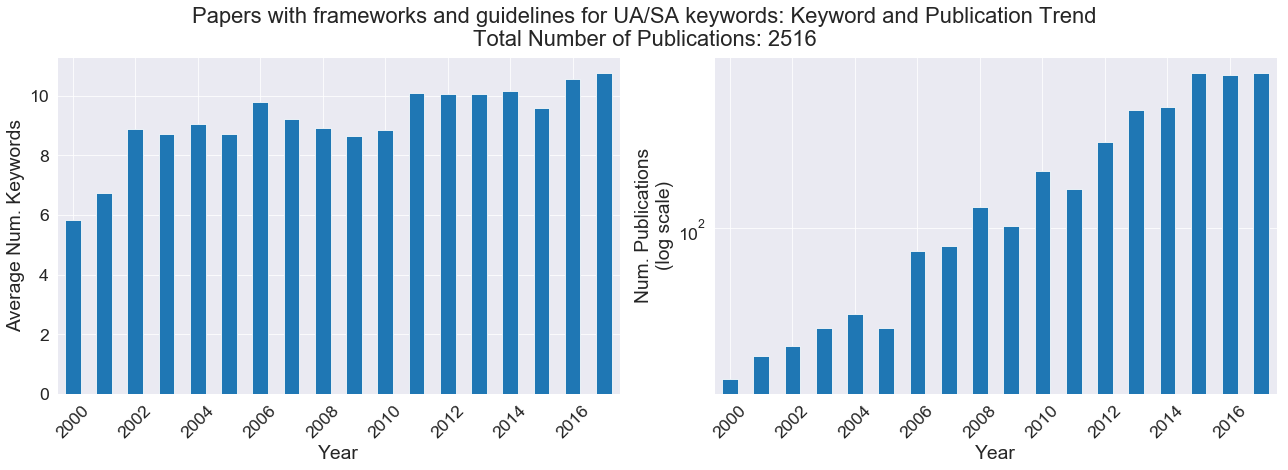

In [32]:
fig_title = 'Papers with frameworks and guidelines for UA/SA keywords: Keyword and Publication Trend'
wos_plot.plot_kw_trend(all_frameworks, title=fig_title)

Removing Frameworks papers from the 'new collection'

After the first citation analysis of these papers, it was clear that there was significant overlap between the Frameworks and Applications sub-corpora. Publications in both Frameworks and Applications sub-corpora were found to be more relevant to Frameworks than Applications.  
<br> Without removing the Frameworks corpora, the Applications corpora comprised 4338 publications.  1933 (45%) of these were from the Frameworks collection.  A key-phrase analysis found that the overlapping publications were more relevant to the Frameworks collection than the Applications collection.
<br> Hence, after the first keyword match, the papers matching to Frameworks were removed from the combined corpora before performing a keyword-match for applications on the remaining papers in the collection.

In [33]:
wo_frameworks = mk.RecordCollection(name='without_frameworks')
for record in all_uasa_sst_papers:
    if not all_frameworks.containsID(record.id):
        wo_frameworks.add(record)

2. Applications of UA/SA

In [34]:
application_kw = ['appl', 'watershed', 'quantify', 'perform', 'calculate', 'in this study', 'catchment']

all_applications = wosis.find_keywords(wo_frameworks, application_kw, threshold=95.0)

In [35]:
all_apps = wosis.rc_to_df(all_applications)

# Save full set to temp dir for later reuse
all_apps.to_csv('{}/all_applications.csv'.format(TMP_DIR), index=False)

all_apps = all_apps.loc[:, ~all_apps.columns.isin(HIDE_COLUMNS)]
all_apps.to_csv('{}/all_applications.csv'.format(DATA_DIR), index=False)


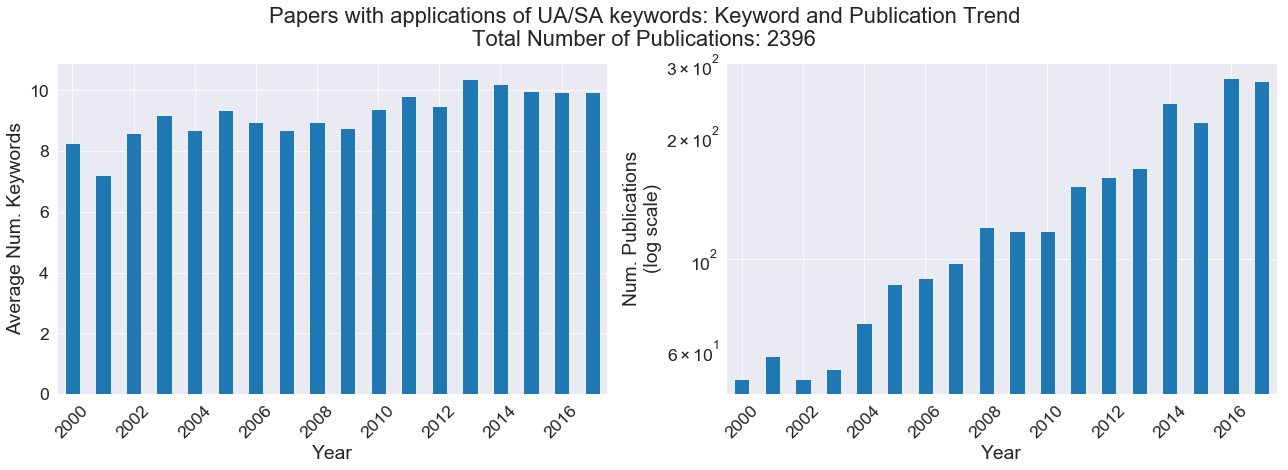

In [36]:
fig_title = 'Papers with applications of UA/SA keywords: Keyword and Publication Trend'
wos_plot.plot_kw_trend(all_applications, title=fig_title)

Trends

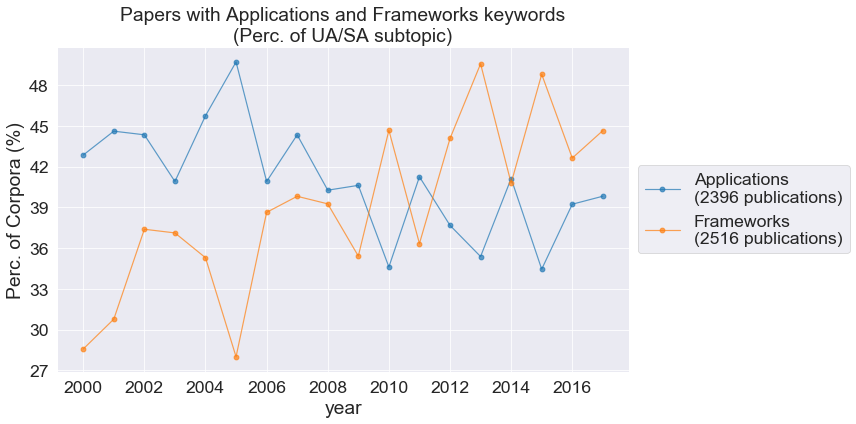

In [37]:
all_applications.name = 'Applications'
all_frameworks.name = 'Frameworks'
wos_plot.plot_topic_trend([all_applications, all_frameworks], 
                          total_rc=all_uasa_sst_papers, 
                          title='Papers with Applications and Frameworks keywords\n(Perc. of UA/SA subtopic)',
                          save_plot_fn='{}/Figure_7b.png'.format(FIG_DIR))

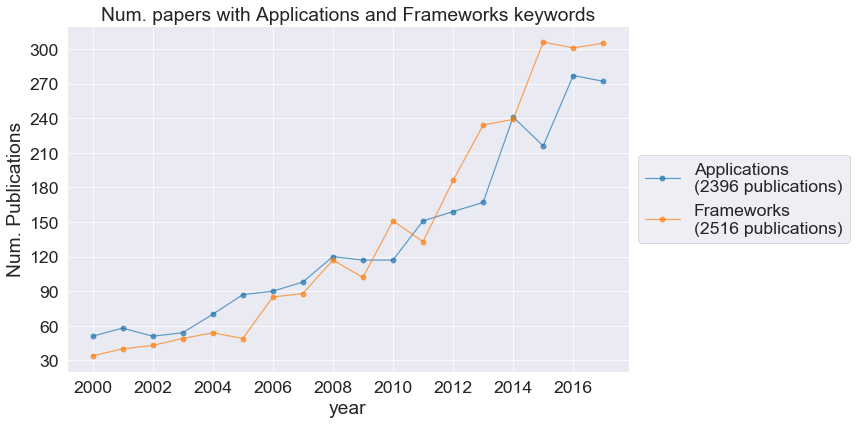

In [38]:
# wos_plot.plot_topic_trend([applications, frameworks], title='Keyword matches topic trend', save_plot_fn='figs/combined_topics_keyword_trend.png')
wos_plot.plot_topic_trend([all_applications, all_frameworks], 
                          title='Num. papers with Applications and Frameworks keywords', 
                          save_plot_fn='{}/Figure_7a.png'.format(FIG_DIR))

Top cited journals
<br> 1. Frameworks

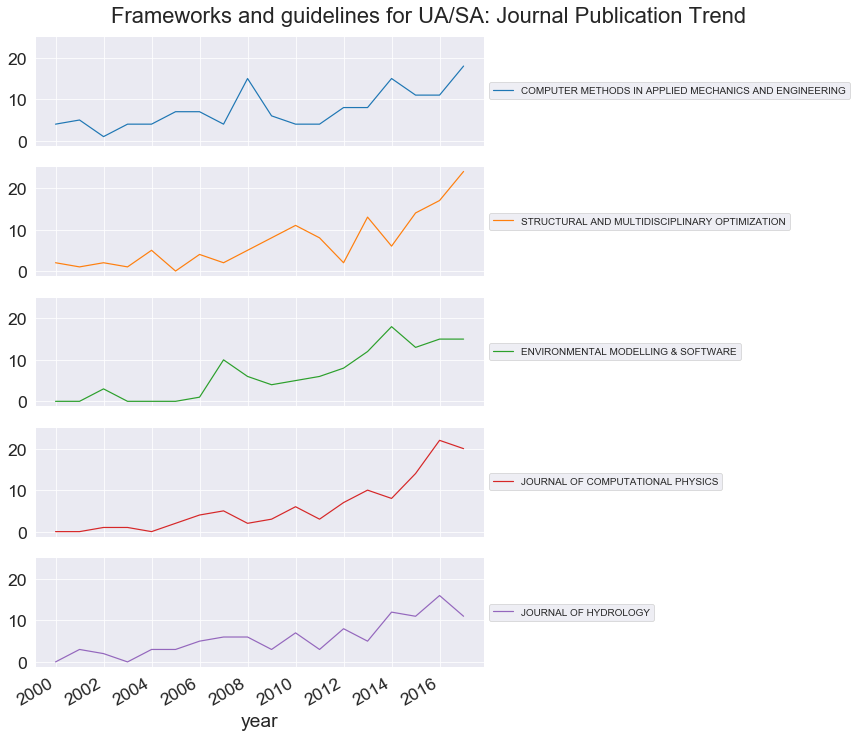

In [39]:
wos_plot.plot_journal_pub_trend(all_frameworks, 
                                top_n=5, 
                                save_plot_fn='{}/Figure_8_framework_journal_pub_trend.png'.format(FIG_DIR), 
                                title='Frameworks and guidelines for UA/SA: Journal Publication Trend')

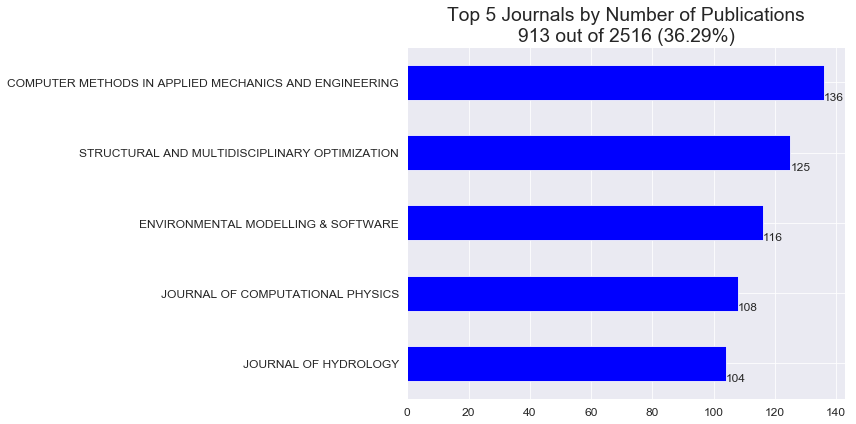

In [40]:
wos_plot.plot_pubs_per_journal(all_frameworks,
                               top_n=5, 
                               annotate=True, 
                               show_stats=True)

In [41]:
journal_titles = ['Environmental Modelling & Software', 'Journal of Hydrology', 
                  'Journal of Computational Physics', 'Structural and Multidisciplinary Optimization', 
                  'Computer Methods in Applied Mechanics and Engineering']

journals_of_interest_frameworks = list(map(str.upper, journal_titles))
pubs_for_journals_frameworks = wosis.find_pubs_by_journal(all_frameworks, journals_of_interest_frameworks)

In [42]:
# Get citations for each paper
cache_fn = "{}/framework_citations_".format(TMP_DIR)

paper_citations_per_journal_frameworks = {}
for pubs in pubs_for_journals_frameworks:
    paper_citations_per_journal_frameworks[pubs] = wosis.get_num_citations(pubs_for_journals_frameworks[pubs], WOS_CONFIG, 
                                                                           cache_as=cache_fn+pubs)
    
    paper_citations_per_journal_frameworks[pubs] = wosis.calc_average_citations(
        paper_citations_per_journal_frameworks[pubs], max_year=2017
    )


In [43]:
cache_fn = '{}/framework_citations_'.format(TMP_DIR)

# Get citations for each paper and cache results
paper_citations_per_journal_framework = {}
for pubs in pubs_for_journals_frameworks:
    paper_citations_per_journal_framework[pubs] = wosis.get_num_citations(pubs_for_journals_frameworks[pubs], WOS_CONFIG,
                                                                    cache_as=cache_fn+pubs)

    # Calc average citations as well
    paper_citations_per_journal_framework[pubs] = wosis.calc_average_citations(
        paper_citations_per_journal_framework[pubs], max_year=2017
    )

In [44]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'Avg. Citations', 'abstract', 'DOI', 'DOI link', 'id']
collection_frameworks = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_frameworks.items():
    df = wosis.link_to_pub(df)
    df['journal'] = df['SO']
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_frameworks = collection_frameworks.append(df[cols_of_interest], ignore_index=True)
    
collection_frameworks.AU = collection_frameworks.AU.str.replace("|", " | ")

In [45]:
top_cited_in_top_journals_frameworks = collection_frameworks.sort_values('citations', ascending=False)

tmp_df = top_cited_in_top_journals_frameworks
tmp_df.loc[:, ~tmp_df.columns.isin(["id"])].head(10)

AU  year  \
212  Bennett, ND | Croke, BFW | Guariso, G | Guilla...  2013   
213  Refsgaard, JC | van der Sluijs, JP | Hojberg, ...  2007   
328                              Sigmund, O | Maute, K  2013   
0    Yang, J | Reichert, P | Abbaspour, KC | Xia, J...  2008   
104                             Blatman, G | Sudret, B  2011   
453                           Moens, D | Vandepitte, D  2005   
329  van Dijk, NP | Maute, K | Langelaar, M | van K...  2013   
330                                Shan, SQ | Wang, GG  2010   
1      Kuczera, G | Kavetski, D | Franks, S | Thyer, M  2006   
454                            Roy, CJ | Oberkampf, WL  2011   

                                                 title  \
212  Characterising performance of environmental mo...   
213  Uncertainty in the environmental modelling pro...   
328  Topology optimization approaches A comparative...   
0    Comparing uncertainty analysis techniques for ...   
104  Adaptive sparse polynomial chaos expansion bas...   
453  A survey of non-probabilistic uncertainty trea...   
329  Level-set methods for structural topology opti...   
330  Survey of modeling and optimization strategies...   
1    Towards a Bayesian total error analysis of con...   
454  A comprehensive framework for verification, va...   

                                               journal citations  \
212                 ENVIRONMENTAL MODELLING & SOFTWARE       595   
213                 ENVIRONMENTAL MODELLING & SOFTWARE       517   
328      STRUCTURAL AND MULTIDISCIPLINARY OPTIMIZATION       405   
0                                 JOURNAL OF HYDROLOGY       316   
104                   JOURNAL OF COMPUTATIONAL PHYSICS       261   
453  COMPUTER METHODS IN APPLIED MECHANICS AND ENGI...       238   
329      STRUCTURAL AND MULTIDISCIPLINARY OPTIMIZATION       207   
330      STRUCTURAL AND MULTIDISCIPLINARY OPTIMIZATION       194   
1                                 JOURNAL OF HYDROLOGY       183   
454  COMPUTER METHODS IN APPLIED MECHANICS AND ENGI...       171   

     Avg. Citations                                           abstract  \
212          119.00  In order to use environmental models effective...   
213           47.00  A terminology and typology of uncertainty is p...   
328           81.00  Topology optimization has undergone a tremendo...   
0             31.60  Distributed watershed models are increasingly ...   
104           37.29  Polynomial chaos (PC) expansions are used in s...   
453           18.31  The objective of this paper is to critically r...   
329           41.40  This review paper provides an overview of diff...   
330           24.25  The integration of optimization methodologies ...   
1             15.25  Calibration and prediction in conceptual rainf...   
454           24.43  An overview of a comprehensive framework is gi...   

                               DOI  \
212  10.1016/j.envsoft.2012.09.011   
213   10.1016/j.envost.2007.02.004   
328      10.1007/s00158-013-0978-6   
0    10.1016/j.jhydrol.2008.05.012   
104      10.1016/j.jcp.2010.12.021   
453      10.1016/j.cma.2004.03.019   
329      10.1007/s00158-013-0912-y   
330      10.1007/s00158-009-0420-2   
1    10.1016/j.jhydrol.2006.05.010   
454      10.1016/j.cma.2011.03.016   

                                             DOI link  
212  https://dx.doi.org/10.1016/j.envsoft.2012.09.011  
213  https://dx.doi.org/10.1016/j.envsoft.2007.02.004  
328      https://dx.doi.org/10.1007/s00158-013-0978-6  
0    https://dx.doi.org/10.1016/j.jhydrol.2008.05.012  
104      https://dx.doi.org/10.1016/j.jcp.2010.12.021  
453      https://dx.doi.org/10.1016/j.cma.2004.03.019  
329      https://dx.doi.org/10.1007/s00158-013-0912-y  
330      https://dx.doi.org/10.1007/s00158-009-0420-2  
1    https://dx.doi.org/10.1016/j.jhydrol.2006.05.010  
454      https://dx.doi.org/10.1016/j.cma.2011.03.016

In [46]:
# export_df = top_cited_in_top_journals_frameworks.loc[:, ~top_cited_in_top_journals_frameworks.columns.isin(hide_columns)]
# export_df.to_csv('{}/framework_top_cited_in_top_journals.csv'.format(DATA_DIR), index=False)

Determining the top papers by average citations since publication

In [47]:
# collection_framework_avg = top_cited_in_top_journals_frameworks.sort_values('Avg. Citations', ascending=False)
# export_df = collection_framework_avg.loc[:, ~collection_framework_avg.columns.isin(hide_columns)]

# export_df.head(10)

In [48]:
#export_df.to_csv('{}/framework_top_avg_cited_in_top_journals.csv'.format(DATA_DIR), index=False)

In [49]:
# top_cited_in_top_journals_frameworks.groupby('year').count()['AU'].plot()
# top_cited_in_top_journals_framework.groupby('year').count()['AU'].plot()
# framework_top_cited = wosis.extract_recs(top_cited_in_top_journals_frameworks.id[0:50], RC)
# wos_plot.plot_pub_trend(framework_top_cited)

Keyphrase analysis of the top-cited Frameworks publications

In [50]:
frameworks_phrases = wosis.analysis.constrain.find_phrases(top_cited_in_top_journals_frameworks)

In [51]:
frameworks_phrases.all_phrases.to_csv('{}/framework_phrases.csv'.format(DATA_DIR))

2. Applications

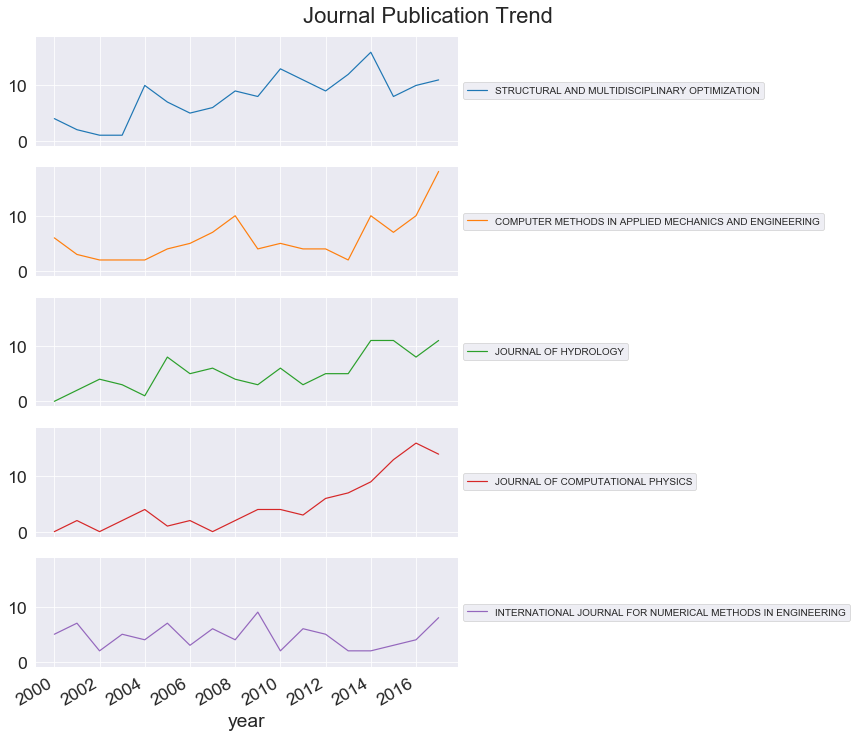

In [52]:
wos_plot.plot_journal_pub_trend(all_applications, top_n=5)
# save_plot_fn='{}/Figure_7.png'.format(FIG_DIR)

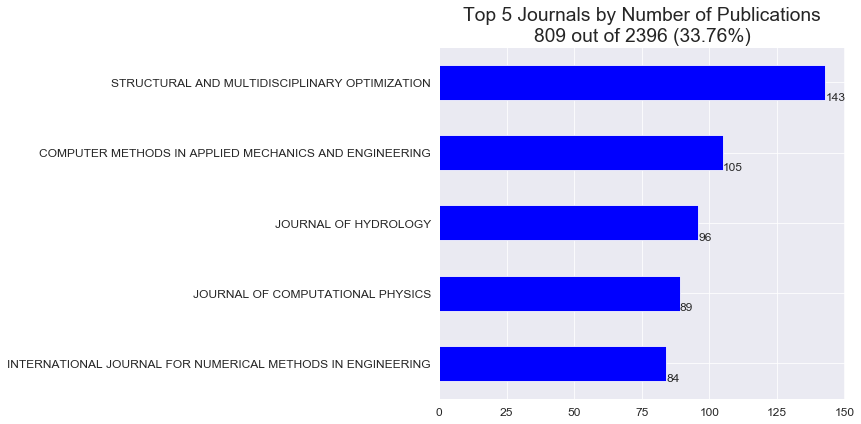

In [53]:
wos_plot.plot_pubs_per_journal(all_applications, top_n=5, annotate=True, show_stats=True)

In [54]:
journals_of_interest_app = map(str.upper, ['Structural and Multidisciplinary Optimization', 
                                           'Journal of Hydrology',
                                           'Computer Methods in Applied Mechanics and Engineering',
                                           'Journal of Computational Physics',
                                           'International Journal for Numerical Methods in Engineering'])
pubs_for_journals_app = wosis.find_pubs_by_journal(all_applications, list(journals_of_interest_app))

In [55]:
cache_fn = '{}/application_citations_'.format(TMP_DIR)
paper_citations_per_journal_app = {}
for pubs in pubs_for_journals_app:
    paper_citations_per_journal_app[pubs] = wosis.get_num_citations(pubs_for_journals_app[pubs], WOS_CONFIG, 
                                                                    cache_as=cache_fn+pubs)

    # Calc average citations as well
    paper_citations_per_journal_app[pubs] = wosis.calc_average_citations(paper_citations_per_journal_app[pubs],
                                                                        max_year=2017)

In [56]:
collection_app = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_app.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_app = collection_app.append(df[cols_of_interest], ignore_index=True)

In [57]:
top_cited_in_top_journals_app = collection_app.sort_values('citations', ascending=False)
top_cited_in_top_journals_app.AU = top_cited_in_top_journals_app.AU.str.replace("|", " | ")

tmp_df = top_cited_in_top_journals_app
tmp_df.loc[:, ~tmp_df.columns.isin(["id"])].head(10)

AU  year  \
105  Yang, J | Reichert, P | Abbaspour, KC | Xia, J...  2008   
237               Pedersen, CBW | Buhl, T | Sigmund, O  2001   
321   Le Maitre, OP | Knio, OM | Najm, HN | Ghanem, RG  2004   
106  McVicar, TR | Van Niel, TG | Li, LT | Hutchins...  2007   
107  Pappenberger, F | Beven, K | Horritt, M | Blaz...  2005   
108  Gong, LB | Xu, CY | Chen, DL | Halldin, S | Ch...  2006   
322   Le Maitre, OP | Najm, HN | Ghanem, RG | Knio, OM  2004   
323                         Oberkampf, WL | Barone, MF  2006   
238                              Stegmann, J | Lund, E  2005   
410  Kharmanda, G | Olhoff, N | Mohamed, A | Lemair...  2004   

                                                 title  \
105  Comparing uncertainty analysis techniques for ...   
237  Topology synthesis of large-displacement compl...   
321  Uncertainty propagation using Wiener-Haar expa...   
106  Spatially distributing monthly reference evapo...   
107  Uncertainty in the calibration of effective ro...   
108  Sensitivity of the Penman-Monteith reference e...   
322  Multi-resolution analysis of Wiener-type uncer...   
323  Measures of agreement between computation and ...   
238  Discrete material optimization of general comp...   
410            Reliability-based topology optimization   

                                               journal citations  \
105                  Applications_JOURNAL OF HYDROLOGY       316   
237  Applications_INTERNATIONAL JOURNAL FOR NUMERIC...       237   
321      Applications_JOURNAL OF COMPUTATIONAL PHYSICS       209   
106                  Applications_JOURNAL OF HYDROLOGY       205   
107                  Applications_JOURNAL OF HYDROLOGY       201   
108                  Applications_JOURNAL OF HYDROLOGY       200   
322      Applications_JOURNAL OF COMPUTATIONAL PHYSICS       181   
323      Applications_JOURNAL OF COMPUTATIONAL PHYSICS       176   
238  Applications_INTERNATIONAL JOURNAL FOR NUMERIC...       169   
410  Applications_STRUCTURAL AND MULTIDISCIPLINARY ...       154   

     Avg. Citations                                           abstract  \
105           31.60  Distributed watershed models are increasingly ...   
237           13.94  This paper describes the use of topology optim...   
321           14.93  An uncertainty quantification scheme is constr...   
106           18.64  Many hydrological models engage spatially dist...   
107           15.46  An uncertainty analysis of the unsteady flow c...   
108           16.67  Sensitivity analysis is important in understan...   
322           12.93  A multi-resolution analysis (MRA) is applied t...   
323           14.67  With the increasing role of computational mode...   
238           13.00  A novel method for doing material optimization...   
410           11.00  The objective of this work is to integrate rel...   

                               DOI  \
105  10.1016/j.jhydrol.2008.05.012   
237                10.1002/nme.148   
321      10.1016/j.jcp.2003.11.033   
106  10.1016/j.jhydrol.2007.02.018   
107  10.1016/j.jhydrol.2004.06.036   
108  10.1016/j.jhydrol.2006.03.027   
322      10.1016/j.jcp.2003.12.020   
323      10.1016/j.jcp.2006.03.037   
238               10.1002/nme.1259   
410      10.1007/s00158-003-0322-7   

                                             DOI link  
105  https://dx.doi.org/10.1016/j.jhydrol.2008.05.012  
237                https://dx.doi.org/10.1002/nme.148  
321      https://dx.doi.org/10.1016/j.jcp.2003.11.033  
106  https://dx.doi.org/10.1016/j.jhydrol.2007.02.018  
107  https://dx.doi.org/10.1016/j.jhydrol.2004.06.036  
108  https://dx.doi.org/10.1016/j.jhydrol.2006.03.027  
322      https://dx.doi.org/10.1016/j.jcp.2003.12.020  
323      https://dx.doi.org/10.1016/j.jcp.2006.03.037  
238               https://dx.doi.org/10.1002/nme.1259  
410      https://dx.doi.org/10.1007/s00158-003-0322-7

In [58]:
top_avg_cited_in_top_journals_app = collection_app.sort_values('Avg. Citations', ascending=False)
top_avg_cited_in_top_journals_app.AU = top_avg_cited_in_top_journals_app.AU.str.replace("|", " | ")

tmp_df = top_avg_cited_in_top_journals_app
tmp_df.loc[:, ~tmp_df.columns.isin(["id"])].head(10)

AU  year  \
105  Yang, J | Reichert, P | Abbaspour, KC | Xia, J...  2008   
3               Wang, YQ | Luo, Z | Kang, Z | Zhang, N  2015   
106  McVicar, TR | Van Niel, TG | Li, LT | Hutchins...  2007   
108  Gong, LB | Xu, CY | Chen, DL | Halldin, S | Ch...  2006   
110     Oh, HJ | Kim, YS | Choi, JK | Park, E | Lee, S  2011   
107  Pappenberger, F | Beven, K | Horritt, M | Blaz...  2005   
125                        Sattar, AMA | Gharabaghi, B  2015   
168      Brunetti, G | Simunek, J | Turco, M | Piro, P  2017   
47   Wang, ZP | Poh, LH | Dirrenberger, J | Zhu, YL...  2017   
321   Le Maitre, OP | Knio, OM | Najm, HN | Ghanem, RG  2004   

                                                 title  \
105  Comparing uncertainty analysis techniques for ...   
3    A multi-material level set-based topology and ...   
106  Spatially distributing monthly reference evapo...   
108  Sensitivity of the Penman-Monteith reference e...   
110  GIS mapping of regional probabilistic groundwa...   
107  Uncertainty in the calibration of effective ro...   
125  Gene expression models for prediction of longi...   
168  On the use of surrogate-based modeling for the...   
47   Isogeometric shape optimization of smoothed pe...   
321  Uncertainty propagation using Wiener-Haar expa...   

                                               journal citations  \
105                  Applications_JOURNAL OF HYDROLOGY       316   
3    Applications_COMPUTER METHODS IN APPLIED MECHA...        69   
106                  Applications_JOURNAL OF HYDROLOGY       205   
108                  Applications_JOURNAL OF HYDROLOGY       200   
110                  Applications_JOURNAL OF HYDROLOGY       109   
107                  Applications_JOURNAL OF HYDROLOGY       201   
125                  Applications_JOURNAL OF HYDROLOGY        46   
168                  Applications_JOURNAL OF HYDROLOGY        15   
47   Applications_COMPUTER METHODS IN APPLIED MECHA...        15   
321      Applications_JOURNAL OF COMPUTATIONAL PHYSICS       209   

     Avg. Citations                                           abstract  \
105           31.60  Distributed watershed models are increasingly ...   
3             23.00  This paper proposes a new Multi-Material Level...   
106           18.64  Many hydrological models engage spatially dist...   
108           16.67  Sensitivity analysis is important in understan...   
110           15.57  This study analyzed the relationships between ...   
107           15.46  An uncertainty analysis of the unsteady flow c...   
125           15.33  Longitudinal dispersion is the key hydrologic ...   
168           15.00  Mechanistic models have proven to be accurate ...   
47            15.00  An important feature that drives the auxetic b...   
321           14.93  An uncertainty quantification scheme is constr...   

                               DOI  \
105  10.1016/j.jhydrol.2008.05.012   
3        10.1016/j.cma.2014.11.002   
106  10.1016/j.jhydrol.2007.02.018   
108  10.1016/j.jhydrol.2006.03.027   
110  10.1016/j.jhydrol.2010.12.027   
107  10.1016/j.jhydrol.2004.06.036   
125  10.1016/j.jhydrol.2015.03.016   
168  10.1016/j.jhydrol.2017.03.013   
47       10.1016/j.cma.2017.05.013   
321      10.1016/j.jcp.2003.11.033   

                                             DOI link  
105  https://dx.doi.org/10.1016/j.jhydrol.2008.05.012  
3        https://dx.doi.org/10.1016/j.cma.2014.11.002  
106  https://dx.doi.org/10.1016/j.jhydrol.2007.02.018  
108  https://dx.doi.org/10.1016/j.jhydrol.2006.03.027  
110  https://dx.doi.org/10.1016/j.jhydrol.2010.12.027  
107  https://dx.doi.org/10.1016/j.jhydrol.2004.06.036  
125  https://dx.doi.org/10.1016/j.jhydrol.2015.03.016  
168  https://dx.doi.org/10.1016/j.jhydrol.2017.03.013  
47       https://dx.doi.org/10.1016/j.cma.2017.05.013  
321      https://dx.doi.org/10.1016/j.jcp.2003.11.033

In [59]:
export_ds = top_cited_in_top_journals_app.loc[:, top_cited_in_top_journals_app.columns != 'id']
export_ds.to_csv('{}/top_cited_in_top_journals_app.csv'.format(DATA_DIR), index=False)

In [60]:
export_ds = top_avg_cited_in_top_journals_app.loc[:, top_avg_cited_in_top_journals_app.columns != 'id']
export_ds.to_csv('{}/top_avg_cited_in_top_journals_app.csv'.format(DATA_DIR), index=False)

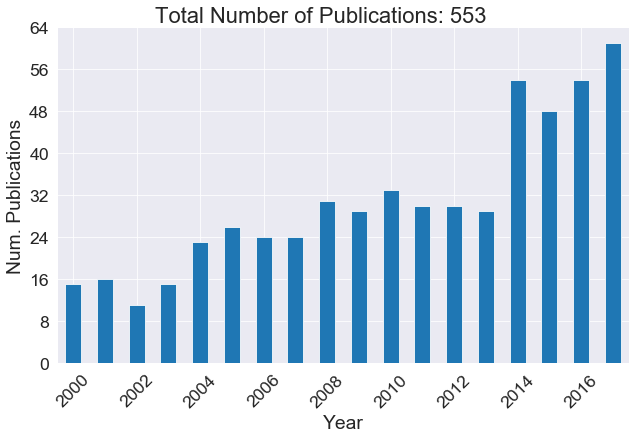

In [61]:
application_top_cited = wosis.extract_recs(top_cited_in_top_journals_app.id, RC)
wos_plot.plot_pub_trend(application_top_cited)

<hr>
Comparing the trend of Applications and Software publications

In [62]:
software_keywords = ['software', 'toolkit', 'toolbox', 'computer program']
all_uc_software = wosis.find_keywords(RC, software_keywords, threshold=95.0)

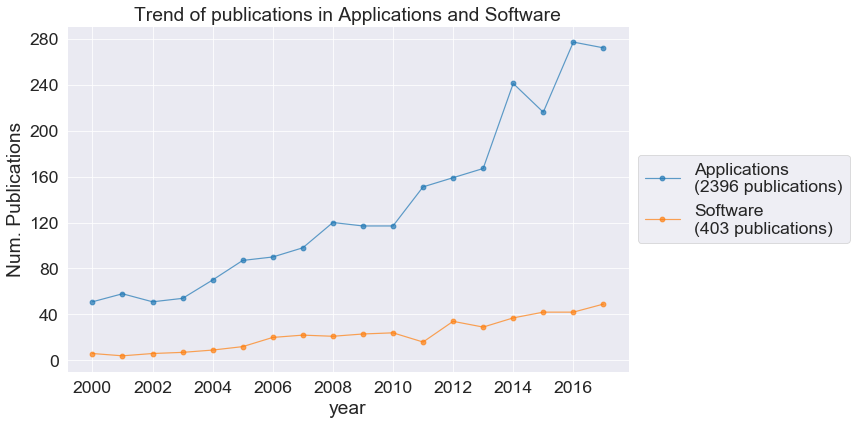

In [63]:
all_applications.name = 'Applications'
all_uc_software.name = 'Software'
wos_plot.plot_topic_trend([all_applications, all_uc_software],
                          title='Trend of publications in Applications and Software')